## <font color="#114b98">      <div align="center">             Catégoriser automatiquement des questions 

Stack Overflow est une  de questions-réponses. Chaque utilisateur doit entrer plusieurs tags afin de retrouver 
facilement la question par la suite. Cela peut une tâche fastidieuse pour des nouveaux utilisateurs ou moins expérimentés.
Il serait judicieux de suggérer quelques tags relatifs à la question posée.

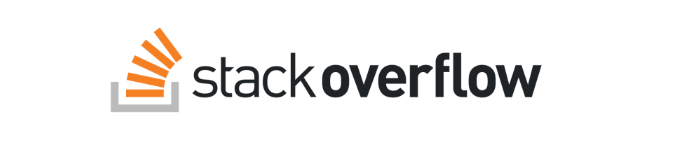

Nous allons développer dans ce projet un système de suggestion de tags pour des questions posées dans ce site. Celui-ci prendra la forme d’un algorithme de machine learning qui assignera automatiquement plusieurs tags pertinents à une question.
Pour récupérer le plus de résultats pertinents on va filtrer les quetions jugées les plus pertinentes, les plus vues, avec au moins 5 tags et ayant reçu une réponse à l'aide de la requête suivante:

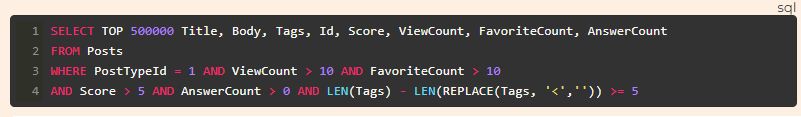

## <font color="#ea1c60">Sommaire</font>  
[1.Chargement et préparation du jeu de données](#section_1)

[2. Nettoyage et Feature Engineering](#section_1)

[3. Exploration des données](#section_2)      

In [1]:
# Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import re
from bs4 import BeautifulSoup
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#pip install langdetect

### Chargement et préparation du jeu de données

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
path = "C:/Users/moumouni/Desktop/Projet_5/"
df = pd.read_csv(path + 'QueryResults.csv')

In [19]:
df.Body[1100]

'<p>I\'ve tried all the other questions and searched everything on this that I could already, a lot of the other questions involved existing apps that were being updated or people with developer accounts but this is like my second time using Xcode and it has worked before.</p>\n\n<p>This just happened out of nowhere. I keep getting these two errors and it allows me to run simulators but not build onto my iPhone:</p>\n\n<ol>\n<li><p>Automatic signing is unable to resolve an issue with the "LearningSpriteKit" target\'s entitlements.\nAutomatic signing can\'t add the application-identifier and keychain-access-groups entitlements to your provisioning profile. Switch to manual signing and resolve the issue by downloading a matching provisioning profile from the developer website. Alternatively, to continue using automatic signing, remove these entitlements from your entitlements file and their associated functionality from your code.</p></li>\n<li><p>Provisioning profile "iOS Team Provision

In [7]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,Print array without brackets and commas,<p>I'm porting a Hangman game to Android and h...,<java><android><arrays><list><collections>,4389480,55,192840,17,12
1,"Allen Holub wrote ""You should never use get/se...","<p>Allen Holub wrote the following,</p>\n\n<bl...",<language-agnostic><oop><immutability><setter>...,996179,51,9946,26,13
2,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,<c><file><directory><cross-platform><common-ta...,12489,68,138108,22,9
3,Returning DataTables in WCF/.NET,<p>I have a WCF service from which I want to r...,<c#><.net><wcf><web-services><datatable>,12702,51,56351,12,8
4,Element not visible error (not able to click a...,"<p>I want to click on a radio button, appears ...",<javascript><angularjs><selenium><selenium-web...,37809915,43,44978,21,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27528 entries, 0 to 27527
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          27528 non-null  object
 1   Body           27528 non-null  object
 2   Tags           27528 non-null  object
 3   Id             27528 non-null  int64 
 4   Score          27528 non-null  int64 
 5   ViewCount      27528 non-null  int64 
 6   FavoriteCount  27528 non-null  int64 
 7   AnswerCount    27528 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.7+ MB


Le jeu de données ne contient pas de valeurs nulles. Aussi que les quaestions ne compte pas de doublons:

In [12]:
df['Body'].duplicated().sum()

0

Nous allons vérifier la langue dont les questions sont rédigées en utilisant  la librerie langdetect:

In [10]:
from langdetect import detect

for index in df.index:
  df.loc[index,'lang'] = detect(df.loc[index,'Body']) 

df['lang'].value_counts()

en    27467
ca       15
fr       12
pt        9
nl        7
da        6
ro        6
it        3
es        2
cs        1
Name: lang, dtype: int64

La majorité des questions sont posées en anglais. Nous filtrons le jeu de données suivant le corps rédigé en anglais:

In [13]:
df = df[df['lang']=='en']

### Nettoyage et exploration 

Nous allons supprimer les valises <> dans les tags: 

In [30]:
for index in df.index:
   # Replace open and close balise 
   df.loc[index,'Tags']=df.loc[index,'Tags'].replace('<','').replace('>', ',')


# Delete last "," for each row
df['Tags'] = df['Tags'].str[:-1]
df.Tags.head()

0                 java,android,arrays,list,collections
1     language-agnostic,oop,immutability,setter,getter
2         c,file,directory,cross-platform,common-tasks
3                   c#,.net,wcf,web-services,datatable
4    javascript,angularjs,selenium,selenium-webdriv...
Name: Tags, dtype: object

In [ ]:
Tag_list = [ for token_list in data.Tags for token in token_list]
df_word_freq = pd.DataFrame(nltk.FreqDist(Tag_tokens).items(),columns=['tag', 'frequency']).set_index('tag')
df_word_freq.sort_values("frequency", ascending=False, inplace=True)
df_word_freq.head(20)

In [57]:
tag_list = []
for word in df['Tags'].str.split(','):
     tag_list.extend(word)

df_tag_list = pd.DataFrame(tag_list, columns=["Tag"])
Tag_list = [ token for token_list in df_tag_list for token in token_list]
df_tag_freq = pd.DataFrame(nltk.FreqDist(Tag_list).items(),columns=['tag', 'frequency']).set_index('tag')
df_tag_freq.sort_values("frequency", ascending=False, inplace=True)
df_tag_freq.head(20)

,frequency
tag,
T,1
a,1
g,1


In [59]:
df['Tags']

0                     java,android,arrays,list,collections
1         language-agnostic,oop,immutability,setter,getter
2             c,file,directory,cross-platform,common-tasks
3                       c#,.net,wcf,web-services,datatable
4        javascript,angularjs,selenium,selenium-webdriv...
                               ...                        
27523           javascript,reactjs,npm-install,yarnpkg,npx
27524    python,machine-learning,package,conda,python-p...
27525               linux,centos,vagrant,virtualbox,redhat
27526     python,macos,terminal,atom-editor,macos-monterey
27527              loops,assembly,optimization,x86-64,simd
Name: Tags, Length: 27467, dtype: object

In [60]:
def count_split_text(df, column):  
  list_tags = []
  for word in df['Tags'].str.split(','):
     list_tags.extend(word)

  df_list_tags = pd.DataFrame(list_tags, columns=["Tag"])
  df_list_tags = df_list_tags.groupby("Tag").agg(tag_count=pd.NamedAgg(column="Tag", aggfunc="count"))
  df_list_tags.sort_values("tag_count", ascending=False, inplace=True)
  return df_list_tags

In [61]:
tags_list = count_text(df=df, column='Tags')
print("Le jeu de données compte {} tags.".format(tags_list.shape[0]))

Le jeu de données compte 12515 tags.


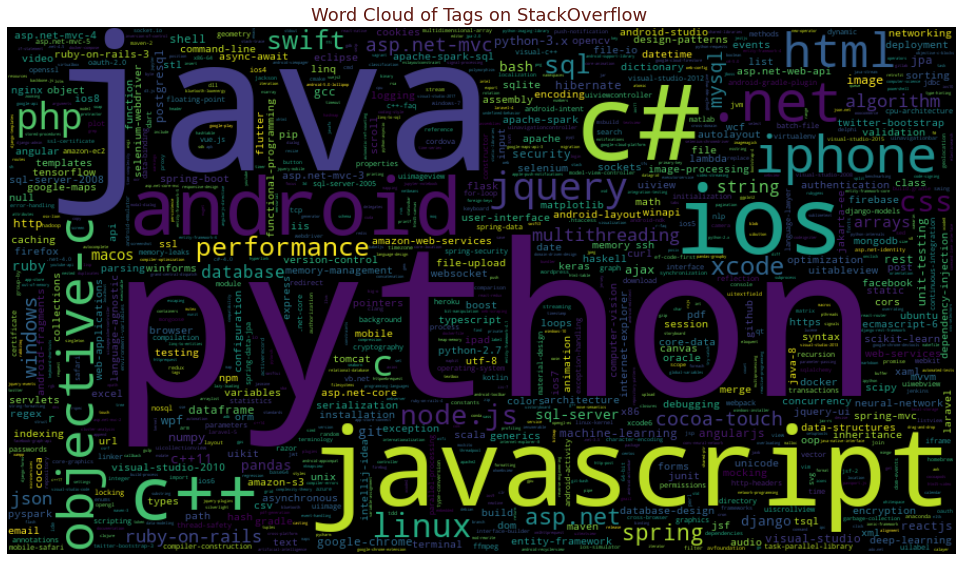

In [62]:
fig = plt.figure(1, figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="black",
                      max_words=1000, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(tags_list.to_dict()['tag_count'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Word Cloud of Tags on StackOverflow ",
          fontsize=18, color="#641E16")
plt.show()

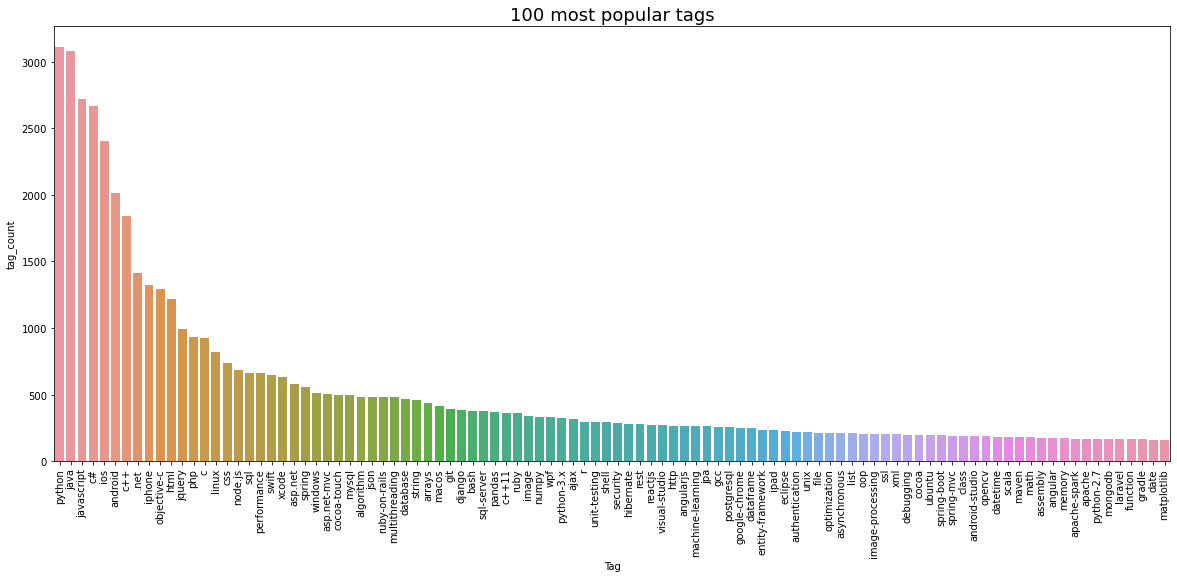

In [63]:
fig = plt.figure(figsize=(20, 8))
sns.barplot(data=tags_list.iloc[0:100, :],
            x=tags_list.iloc[0:100, :].index,
            y="tag_count")
plt.xticks(rotation=90)
plt.title("100 most popular tags",
          fontsize=18)
plt.show()

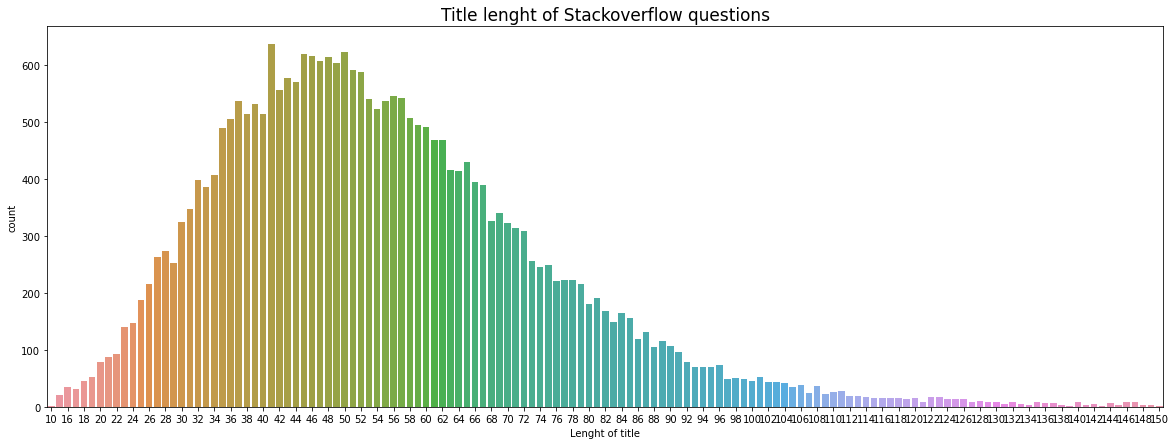

In [64]:
fig = plt.figure(figsize=(20, 7))
ax = sns.countplot(x=df.Title.str.len())
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end,2))
ax.set_xlabel("Lenght of title")
plt.title("Title lenght of Stackoverflow questions",
          fontsize=17)
plt.show()

In [65]:
def remove_code(x):
    """Function based on the Beautifulsoup library intended to replace 
    the content of all the <code> </code> tags of a text specified as a parameter.
    """
    soup = BeautifulSoup(x,"lxml")
    code_to_remove = soup.findAll("code")
    for code in code_to_remove:
        code.replace_with(" ")
    return str(soup)

In [66]:
df['Body'] = df['Body'].apply(lambda text: remove_code(text))

In [67]:
df.Body = [BeautifulSoup(text,"lxml").get_text() for text in df.Body]

In [68]:
def clean_text(text):
    #Make text lowercase
    text = text.lower()
    # Remove English contractions
    text = re.sub("\'\w+", ' ', text)
    #
    text = text.encode("ascii", "ignore").decode()
    # Remove ponctuation (except # and ++ for c# and c++)
    text = re.sub('[^\\w\\s#\\s++]', ' ', text)
    # Remove links
   # text = re.sub(r'http*\S+', ' ', text)
    # Remove numbers
    text = re.sub(r'\w*\d+\w*', ' ', text)
    # Remove extra spaces
    text = re.sub('\s+', ' ', text)
    return text

In [69]:
# Applying the cleaning function 
df['Body'] = df['Body'].apply(lambda text: clean_text(text))
df['Title'] = df['Title'].apply(lambda text: clean_text(text))
df['Tags'] = df['Tags'].apply(lambda text: clean_text(text))

In [70]:
df[['Body','Title','Tags']].head()

,Body,Title,Tags
0,i porting a hangman game to android and have m...,print array without brackets and commas,java android arrays list collections
1,allen holub wrote the following you can have a...,allen holub wrote you should never use get set...,language agnostic oop immutability setter getter
2,how do you scan a directory for folders and fi...,how do you get a directory listing in c,c file directory cross platform common tasks
3,i have a wcf service from which i want to retu...,returning datatables in wcf net,c# net wcf web services datatable
4,i want to click on a radio button appears on a...,element not visible error not able to click an...,javascript angularjs selenium selenium webdriv...


Nous utilisons la simple fonction split() comme séparateur des mots:

In [78]:
def words_tokenize(text):
  text = text.split(" ")
  return text

In [79]:
df['Body'] = df.Body.apply(lambda text: words_tokenize(text))
df['Title'] = df.Title.apply(lambda text: words_tokenize(text))
df['Tags'] = df.Tags.apply(lambda text: words_tokenize(text))

AttributeError: 'list' object has no attribute 'split'

La lemmatisation ("*lemmatization*") est le processus de conversion d'un mot en sa forme de base en prenant compte contexte. La différence entre la avec la radicalisation ("*stemming*") est que ce dernier supprime les suffixes, implique souvent des significations incorrectes et des fautes d'orthographe. Nous utilisons ici "Wordnet Lemmatizer" avec des POS appropriées basabt sur la fonction "nltk.pos_tag".

In [80]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
# 1. Init Lemmatizer
lemmatizer = nltk.WordNetLemmatizer()
def lem_word(text):
  # 3. Lemmatize with the appropriate POS tag
  return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in text]

df['Body'] = df.Body.apply(lem_word)
df['Title'] = df.Title.apply(lem_word)
df['Tags'] = df.Tags.apply(lem_word)

In [ ]:

df['Body'] = df.Body.apply(lem_word)
df['Title'] = df.Title.apply(lem_word)
df['Tags'] = df.Tags.apply(lem_word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df[['Body','Title','Tags']].head()

,Body,Title,Tags
0,"[i, port, a, hangman, game, to, android, and, ...","[print, array, without, bracket, and, comma]","[java, android, array, list, collection]"
1,"[allen, holub, write, the, follow, you, can, h...","[allen, holub, write, you, should, never, use,...","[language, agnostic, oop, immutability, setter..."
2,"[how, do, you, scan, a, directory, for, folder...","[how, do, you, get, a, directory, listing, in, c]","[c, file, directory, cross, platform, common, ..."
3,"[i, have, a, wcf, service, from, which, i, wan...","[return, datatables, in, wcf, net]","[c#, net, wcf, web, service, datatable]"
4,"[i, want, to, click, on, a, radio, button, app...","[element, not, visible, error, not, able, to, ...","[javascript, angularjs, selenium, selenium, we..."


In [ ]:
stop_words = []
# open file and read the content in a list
with open('/content/drive/MyDrive/' +'stop_words_en.txt', "r") as fp:
    for line in fp:
        # remove linebreak from a current name
        x = line[:-1]
        stop_words.append(x)

In [ ]:
most_tag = tags_list.iloc[0:200, :].index
list_swc = []
for word in most_tag:
  if word in stop_words:
    list_swc.append(word)
    stop_words.remove(word)

print(list_swc)
len(stop_words)

['html', 'c', 'r', 'shell', 'http', 'date']


1292

In [ ]:
# removing stopwords
def remove_stopwords(raw):
    words = [w for w in raw if w not in stop_words ]
    return words 
    
df.Body = df.Body.apply(lambda word : remove_stopwords(word))
df.Title = df.Title.apply(lambda word : remove_stopwords(word))
df.Tags = df.Tags.apply(lambda word : remove_stopwords(word))
df[['Body','Title','Tags']].head()

,Body,Title,Tags
0,"[port, hangman, game, android, met, original, ...","[print, array, bracket, comma]","[java, android, array, list, collection]"
1,"[allen, holub, write, follow, program, couple,...","[allen, holub, write, set, function, correct]","[language, agnostic, oop, immutability, setter..."
2,"[scan, directory, folder, file, c, cross, plat...","[directory, listing, c]","[c, file, directory, cross, platform, common, ..."
3,"[wcf, service, return, datatable, highly, deba...","[return, datatables, wcf]","[c#, wcf, service, datatable]"
4,"[radio, button, code, follow, html, code, tess...","[element, visible, error, element]","[javascript, angularjs, selenium, selenium, we..."


In [ ]:
data = df.copy()

Supprimer les mots récurrents dans la même liste:

In [ ]:
data.Tags = data.Tags.apply(lambda raw : list(set(raw)))
data.Title = data.Title.apply(lambda raw : list(set(raw)))
data.Body = data.Body.apply(lambda raw : list(set(raw)))

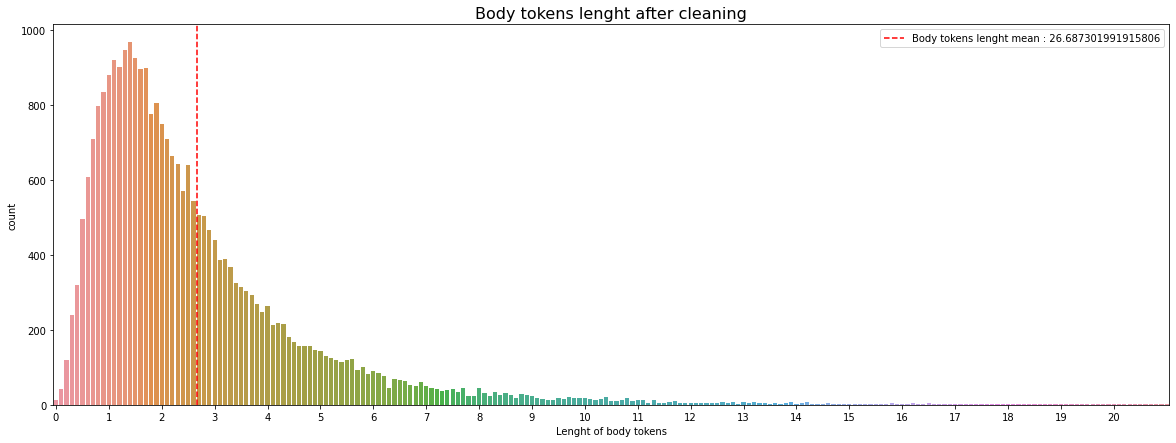

In [ ]:
# Calculate lenght of each list in Body
data['body_count'] = [len(raw) for raw in data.Body]

# Countplot of body lenght
fig = plt.figure(figsize=(20, 7))
ax = sns.countplot(x=data.body_count)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, int(end), 10))
plot_mean = data.body_count.mean()
plt.axvline(plot_mean, color="r", linestyle='--', label="Body tokens lenght mean : "+str(plot_mean))
ax.set_xlabel("Lenght of body tokens")
plt.title("Body tokens lenght after cleaning",
          fontsize=16)
plt.legend()
plt.show()

In [ ]:
data.shape

(27461, 10)

In [ ]:
# Filter data on body lenght
data = data[(5<data['body_count']) & (data['body_count']<150)]
data.shape

(26128, 10)

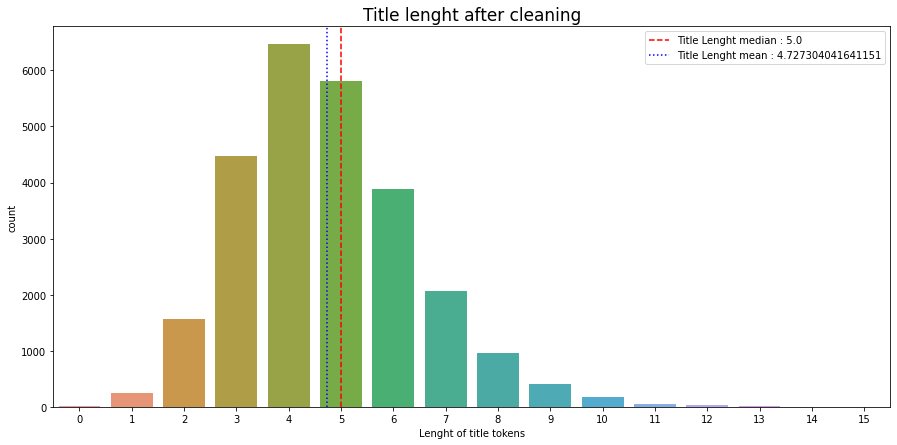

In [ ]:
# Calculate lenght of each list in Body
data['Title_count'] = [len(text) for text in data.Title]

# Countplot of body lenght
fig = plt.figure(figsize=(15, 7))
ax = sns.countplot(x=data.Title_count)
median_plot = data.Title_count.median()
plt.axvline(median_plot ,
            color="r", linestyle='--',
            label="Title Lenght median : "+str(median_plot))
mean_plot = data.Title_count.mean()
plt.axvline(mean_plot ,
            color="b", linestyle=':',
            label="Title Lenght mean : "+str(mean_plot))
ax.set_xlabel("Lenght of title tokens")
plt.title("Title lenght after cleaning",
          fontsize=17)
plt.legend()
plt.show()

In [ ]:
# Filter data on body lenght
data = data[(data['Title_count']>2)&(data['Title_count']<12)]
data.shape

(24269, 11)

In [ ]:
Tag_tokens = [token for token_list in data.Tags for token in token_list]
df_word_freq = pd.DataFrame(nltk.FreqDist(Tag_tokens).items(),columns=['tag', 'frequency']).set_index('tag')
df_word_freq.sort_values("frequency", ascending=False, inplace=True)
df_word_freq.head(20)

,frequency
tag,
python,2839
java,2814
javascript,2436
c#,2358
android,1904
c,1822
c++,1603
iphone,1168
html,1108


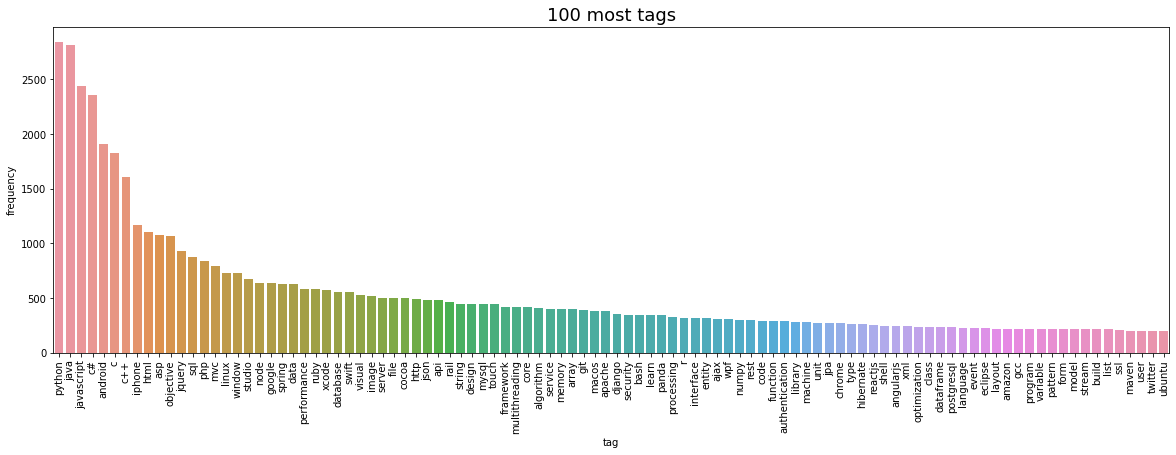

In [ ]:
fig = plt.figure(figsize=(20, 6))
sns.barplot(data=df_word_freq.iloc[0:100, :],
            x=df_word_freq.iloc[0:100, :].index,
            y="frequency")
plt.xticks(rotation=90)
plt.title("100 most tags",
          fontsize=18)
plt.show()

In [ ]:
# filtering data from 50 most tags
def filter_tags(raw):
    tokens = [w for w in raw if w in  df_word_freq[0:50].index ]
    return tokens 

data.Tags = data.Tags.apply(lambda word : filter_tags(word))

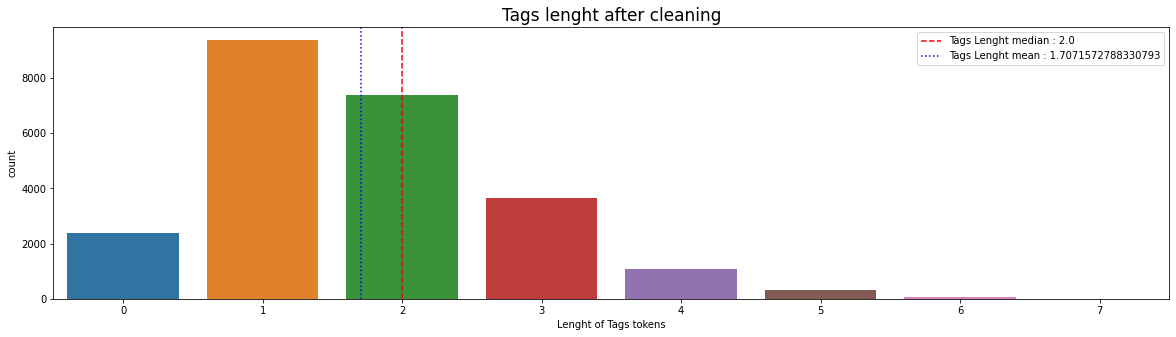

In [ ]:
# Calculate lenght of each list in Body
data['Tags_count'] = [len(text) for text in data.Tags]

# Countplot of body lenght
fig = plt.figure(figsize=(20, 5))
ax = sns.countplot(x=data.Tags_count)
median_plot = data.Tags_count.median()
plt.axvline(median_plot ,
            color="r", linestyle='--',
            label="Tags Lenght median : "+str(median_plot))
mean_plot = data.Tags_count.mean()
plt.axvline(mean_plot ,
            color="b", linestyle=':',
            label="Tags Lenght mean : "+str(mean_plot))
ax.set_xlabel("Lenght of Tags tokens")
plt.title("Tags lenght after cleaning",
          fontsize=17)
plt.legend()
plt.show()

In [ ]:
# Filter data on body lenght
data = data[data['Tags_count']>0]
data.shape

(21875, 12)

In [ ]:
data.Tags_count.head()

0    3
2    2
3    2
4    1
6    3
Name: Tags_count, dtype: int64

Nous allons réduire le nombre de tags en ne retenant que les 100 premiers tags,
afin d'augementer l'efficacité des modèles supervisés.

In [ ]:
data.Tags.head()

0    [array, android, java]
2                 [c, file]
3             [c#, service]
4              [javascript]
6    [database, php, mysql]
Name: Tags, dtype: object

In [ ]:
data['text_comb'] = data['Body'] + data['Title']

In [ ]:
top_tag = df_word_freq[0:50].index
data['Tags_shar_length'] = data.text_comb.apply(lambda raw : len(top_tag)-len(set(top_tag)-set(raw)))
data = data[data['Tags_shar_length']>0]
data.shape

(19117, 14)

In [ ]:
data.head(3)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,lang,body_count,Title_count,Tags_count,text_comb,Tags_shar_length
0,"[comma, array, print, bracket]","[fit, console, game, original, format, comma, ...","[array, android, java]",4389480,55,192840,17,12,en,30,4,3,"[fit, console, game, original, format, comma, ...",3
2,"[directory, c, listing]","[scan, c, file, folder, platform, cross, direc...","[c, file]",12489,68,138108,22,9,en,7,3,2,"[scan, c, file, folder, platform, cross, direc...",2
3,"[return, wcf, datatables]","[table, underlie, timeouts, data, connection, ...","[c#, service]",12702,51,56351,12,8,en,38,3,2,"[table, underlie, timeouts, data, connection, ...",4


In [2]:
# Export to CSV
data[['Title', 'Body','Tags','text_comb']].to_csv("Stack_questions_cleaned.csv", index=False,header=True,sep=';')

NameError: name 'data' is not defined